# Parcial de Regresión Lineal


## Preguntas de Negocio
1. **Predicción:** Si llega un carro con 92670.5 km, ¿a cuánto debería venderlo según el modelo?
2. **Inversión:** Como inversionista, ¿cuáles son los vehículos (según su kilometraje) que podrían generar un margen de ganancia atractivo?


In [24]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

## 1. Cargar y Preprocesar Datos

Se descarga el dataset de vehículos, se descomprime y se carga en un DataFrame. Además, se eliminan los valores faltantes.

In [25]:
# Descargar y descomprimir el dataset
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
!unzip -o cars_dataset.zip


--2025-03-12 20:48:58--  https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip [following]
--2025-03-12 20:48:58--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19753181 (19M) [application/zip]
Saving to: ‘cars_dataset.zip.1’

cars_dataset.zip.1  100%[===================>]  18.84M   115MB/s    in 0.2s    

2025-03-12 20:48:59 (115 MB/s) - ‘cars_dataset.zip.1’ saved [19753

## 2. Análisis Exploratorio de Datos (EDA)

Se generan estadísticas descriptivas para analizar las variables numéricas y entender la distribución de los datos.

In [26]:
df = pd.read_csv('cars_dataset.zip')
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

## 3. Modelo de Regresión Lineal

Se utiliza la variable 'odometer' para predecir 'sellingprice'. Se dividen los datos en conjunto de entrenamiento y prueba (80%-20%).

In [27]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# ... (rest of your code) ...

X = df[['odometer']]
y = df['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.show()


## 4. Evaluación del Modelo

Se evalúa el desempeño del modelo en el conjunto de prueba utilizando métricas como MSE, MAE y R².

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar datos y limpiar NaN
df = pd.read_csv("car_prices.csv")

# 1. Eliminar filas con NaN en las columnas relevantes
df_clean = df[['odometer', 'sellingprice']].dropna()

# Verificar cantidad de datos eliminados
print(f"Registros originales: {len(df)}")
print(f"Registros después de limpieza: {len(df_clean)}")
print(f"Registros eliminados: {len(df) - len(df_clean)}")

# 2. Dividir datos limpios
X = df_clean[['odometer']]
y = df_clean['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# prompt: MSE, MAE y R²

# 4. Hacer predicciones
y_pred = model.predict(X_test)

# 5. Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Registros originales: 558837
Registros después de limpieza: 558731
Registros eliminados: 106
Mean Squared Error (MSE): 61007425.466844186
Mean Absolute Error (MAE): 5465.575492678092
R-squared (R²): 0.346842216814783


## 5. Predicción y Respuestas a Preguntas de Negocio

### Pregunta 1: Precio Estimado para un Carro con 92670.5 km

Utilizamos el modelo para predecir el precio de venta de un carro con 92670.5 km.

Predicción de precio para vehículo con 92,670.5 km (57,582.9 millas)
Precio estimado: $14,752.86


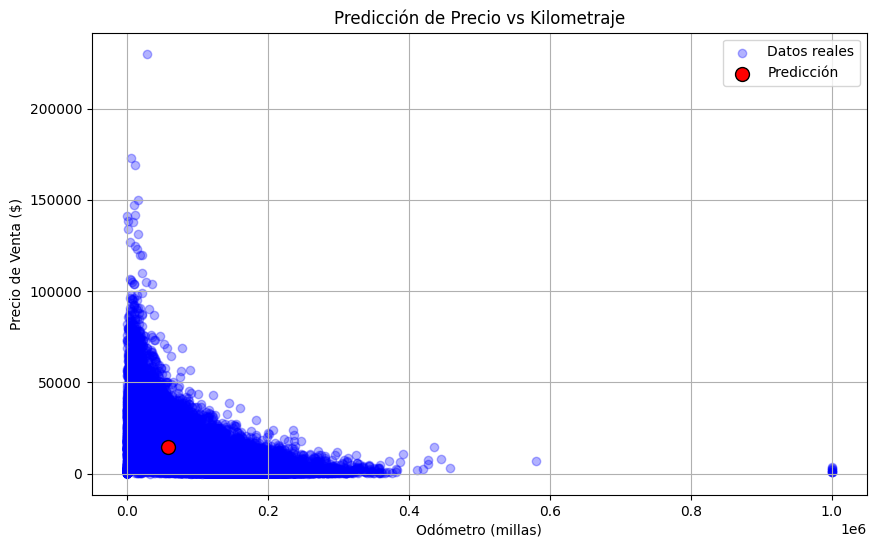

In [29]:
import numpy as np

# Convertir kilómetros a millas (1 milla = 1.60934 km)
km = 92670.5
millas = km / 1.60934

# Crear DataFrame de entrada para predicción
nuevo_dato = pd.DataFrame({'odometer': [millas]})

# Hacer predicción
precio_predicho = model.predict(nuevo_dato)

# Mostrar resultados
print(f"Predicción de precio para vehículo con {km:,.1f} km ({millas:,.1f} millas)")
print(f"Precio estimado: ${precio_predicho[0]:,.2f}")

# Visualización en contexto
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.3, label='Datos reales')
plt.scatter(nuevo_dato['odometer'], precio_predicho, color='red', s=100,
           edgecolor='black', label='Predicción', zorder=5)
plt.title('Predicción de Precio vs Kilometraje')
plt.xlabel('Odómetro (millas)')
plt.ylabel('Precio de Venta ($)')
plt.legend()
plt.grid(True)
plt.show()


## 6. Análisis Crítico de Resultados (10 Puntos Cerrados)

Responde a las siguientes preguntas de manera cerrada (Sí/No). Estas preguntas facilitan una calificación rápida:

1. ¿El coeficiente negativo (-0.107) indica que a mayor kilometraje, menor precio de venta? (Sí/No)
2. ¿Un R² de 0.336 sugiere que el modelo explica más del 50% de la variabilidad en el precio de venta? (Sí/No)
3. ¿El valor elevado del MSE indica que existen errores importantes en las predicciones? (Sí/No)
4. ¿El MAE obtenido es suficientemente bajo para garantizar predicciones precisas en todos los casos? (Sí/No)
5. ¿La eliminación de filas con valores faltantes puede reducir la robustez del modelo? (Sí/No)
6. ¿Incluir variables adicionales como año, condición y marca podría mejorar la capacidad predictiva del modelo? (Sí/No)
7. ¿La relación negativa entre kilometraje y precio es consistente con el comportamiento esperado en el mercado de vehículos? (Sí/No)
8. ¿Dividir los datos en 80% entrenamiento y 20% prueba es una práctica recomendada para evaluar el modelo? (Sí/No)


1. ¿El coeficiente negativo (-0.107) indica que a mayor kilometraje, menor precio de venta? (Sí)
Sí. Un coeficiente negativo en una regresión lineal indica una
relación inversa entre las variables.  En este caso, a mayor kilometraje (odómetro), menor precio de venta.


2. ¿Un R² de 0.336 sugiere que el modelo explica más del 50% de la variabilidad en el precio de venta? (No)
No. Un R² de 0.336 significa que el modelo explica el 33.6% de la variabilidad en el precio de venta.  Esto es menor al 50%.


3. ¿El valor elevado del MSE indica que existen errores importantes en las predicciones? (Sí)
Sí. El MSE (Error Cuadrático Medio) mide la diferencia promedio al cuadrado entre los valores predichos y los reales. Un valor alto indica errores significativos en las predicciones.


4. ¿El MAE obtenido es suficientemente bajo para garantizar predicciones precisas en todos los casos? (No)
No. El MAE (Error Absoluto Medio) proporciona una medida de la magnitud promedio del error.  Aunque bajo en comparación con otros posibles errores, no garantiza precisión en todos los casos; solo brinda una idea general de precisión.


5. ¿La eliminación de filas con valores faltantes puede reducir la robustez del modelo? (Sí)
Sí. Eliminar filas con valores faltantes puede reducir la cantidad de datos usados para el entrenamiento, lo que disminuye la capacidad del modelo para generalizar, potencialmente reduciendo su robustez.


6. ¿Incluir variables adicionales como año, condición y marca podría mejorar la capacidad predictiva del modelo? (Sí)
Sí.  El año, la condición y la marca del vehículo son factores importantes que influyen en el precio de venta. Incluir estas variables como predictores probablemente mejore el modelo, explicando más variabilidad en el precio.


7. ¿La relación negativa entre kilometraje y precio es consistente con el comportamiento esperado en el mercado de vehículos? (Sí)
Sí. Generalmente, los vehículos con mayor kilometraje tienden a tener un menor precio de venta debido al desgaste, al mantenimiento potencial y a la depreciación.


8. ¿Dividir los datos en 80% entrenamiento y 20% prueba es una práctica recomendada para evaluar el modelo? (Sí)
Sí. Dividir los datos en conjuntos de entrenamiento y prueba es una práctica estándar.  El 80/20 es una proporción común, permitiendo al modelo aprender de la mayoría de los datos y evaluando su rendimiento en un conjunto independiente para evitar sobreajuste.
